Import Libraries

In [1]:
import numpy as np
import pandas as pd
import json

from geopy.geocoders import Nominatim

from urllib.request import urlopen
import urllib.parse

import requests

import folium

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

Preparing DataFrame

In [2]:
Hyderabad_areas = pd.DataFrame(columns = ['Areas', 'Latitude', 'Longitude'])
loc = open('Hyderabad_Locations.txt')
i = 0
for line in loc:
    line = line.strip().split(';')
    Hyderabad_areas.loc[i, 'Areas'] = line[0]
    Hyderabad_areas.loc[i, 'Latitude'] = float(line[1])
    Hyderabad_areas.loc[i, 'Longitude'] = float(line[2])
    i += 1
Hyderabad_areas.head()

,Areas,Latitude,Longitude
0,Gachibowli,17.4436,78.352
1,Shamshabad,17.2611,78.3932
2,Kukatpally,17.4931,78.4054
3,Mallapur,17.4405,78.5789
4,Habsiguda,17.4155,78.5427


Finding Hyderabad location from Nominatim

In [3]:
address = 'Hyderabad'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Hyderabad are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hyderabad are 17.360589, 78.4740613.


Map of Hyderabad

In [4]:
Hyderabad_map = folium.Map(location = [latitude, longitude], zoom_start = 11)
Hyderabad_map

Details of My FourSquare Api

In [12]:
CLIENT_ID = 'R3BDSKOQGE1OIEEHO0BQMXEOQFR1FKCYBBEBHA2C4ZYAGMDR' # your Foursquare ID
CLIENT_SECRET = 'P2U0AKEDOQCKV1IF14PEM1BEF002L32ZRLOIUNXNGMLLMBIY' # your Foursquare Secret
#VERSION = '20180605' # Foursquare API version
VERSION = '20210808'
LIMIT = 100 # A default Foursquare API limit value
radius = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R3BDSKOQGE1OIEEHO0BQMXEOQFR1FKCYBBEBHA2C4ZYAGMDR
CLIENT_SECRET:P2U0AKEDOQCKV1IF14PEM1BEF002L32ZRLOIUNXNGMLLMBIY


locations of Neighborhoods in Hyderabad

In [13]:
Hyderabad_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

#add markers
for label, lat, long in zip(Hyderabad_areas['Areas'], Hyderabad_areas['Latitude'], Hyderabad_areas['Longitude']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius = 4,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.6,
        parse_html = False).add_to(Hyderabad_map)

Hyderabad_map

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        #print(url)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Extracting Venue details for Neighborhoods in Hyderabad

In [15]:
Hyderabad_venues = getNearbyVenues(names = Hyderabad_areas['Areas'],
                                   latitudes = Hyderabad_areas['Latitude'],
                                   longitudes = Hyderabad_areas['Longitude']
                                  )

Gachibowli
Shamshabad
Kukatpally
Mallapur
Habsiguda
Jubilee Hills
Secunderabad
Banjara Hills
Manikonda
Ameerpet
Shamirpet
Sainikpuri
Srinagar Colony
Quthbullapur
A C Guards
Abids Road
Adarsh Nagar
Adikmet
Afzalgunj
Ahmed Nagar
Akbar Road
Aliabad
Alwal
Amberpet
Ameerpet X Road
Anand Bagh
Anand Nagar Colony
Ashok Nagar
Asif Nagar
Attapur
Attapur Ring Road
Auto Nagar
Azamabad
Badichowdi
Bagh Amberpet
Bagh Lingampally
Bahadurpura
Bairamalguda
Bakaram
Balapur
Balkampet
Bandlaguda
Bank Street
Bapuji Nagar
Barkas
Barkatpura
Basheerbagh
Begum Bazar
Bhagya Nagar Colony
Bharat Nagar
Bhel
Bholakpur
Bk Guda
Boggulakunta
Borabanda
Boudha Nagar
Bowenpally
Boyiguda
Chaderghat
Chaitanyapuri
Champapet
Champapet X Road
Chanchalguda
Chanda Nagar
Chandrayangutta
Charminar
Cherlapally
Chikkadpally
Chilkalguda
Chintal
Chintal Basti
Chintalkunta
Chirag Ali Lane
Chudi Bazar
D D Colony
Dabeerpura
Dabeerpura North
Darul Shifa
Defence Colony
Diamond Point
Dilsukhnagar Main Road
Domalguda
Doodh Bowli
Dr. A.S Rao 

In [16]:
Hyderabad_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Gachibowli,17.443622,78.351964,Karachi Bakery,17.442930,78.355336,Bakery
1,Gachibowli,17.443622,78.351964,Gachibowli Stadium,17.445982,78.348245,Stadium
2,Gachibowli,17.443622,78.351964,creamstone,17.442998,78.355475,Ice Cream Shop
3,Gachibowli,17.443622,78.351964,Chettinaduvilas,17.442858,78.356053,Food Truck
4,Gachibowli,17.443622,78.351964,Mustang terrace,17.442840,78.355320,Italian Restaurant


In [17]:
Hyderabad_venues.shape

(2131, 7)

Groupby of each Neighborhood and count of venues in each Neighborhood

In [18]:
Hyderabad_venues.groupby('Neighborhood').count().sort_values(by = 'Venue', ascending = False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Himayat Nagar,44,44,44,44,44,44
Raj Bhavan Road,30,30,30,30,30,30
Hyderabad Central,29,29,29,29,29,29
Jubilee Hills,29,29,29,29,29,29
Panjagutta,25,25,25,25,25,25
...,...,...,...,...,...,...
Chintal Basti,1,1,1,1,1,1
Chandrayangutta,1,1,1,1,1,1
Champapet X Road,1,1,1,1,1,1


In [19]:
print('There are {} uniques categories.'.format(len(Hyderabad_venues['Venue Category'].unique())))

There are 170 uniques categories.


In [20]:
Hyderabad_onehot = pd.get_dummies(Hyderabad_venues[['Venue Category']], prefix = '', prefix_sep = '')

Hyderabad_onehot['Neighborhood'] = Hyderabad_venues['Neighborhood']

Hyderabad_onehot.head()

,ATM,Accessories Store,Afghan Restaurant,Airport Service,Airport Terminal,Andhra Restaurant,Arcade,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,...,Tex-Mex Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


First Venues is converted to columns and doing mean of groupby Neighborhood

In [21]:
Hyderabad_grouped = Hyderabad_onehot.groupby('Neighborhood').mean().reset_index()
Hyderabad_grouped

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport Service,Airport Terminal,Andhra Restaurant,Arcade,Argentinian Restaurant,Arts & Crafts Store,...,Tex-Mex Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wings Joint,Women's Store
0,A C Guards,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.083333,0.000000,0.0,0.0,0.0
1,AG Office,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.111111,0.0,0.0,0.0
2,Abids,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,Abids Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,Adarsh Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,West Marredpally,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
330,Yapral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
331,Yellareddyguda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
332,Yousufguda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


Top 5 venues for each Neighborhood

In [22]:
num_top_venues = 5

for neighbor in Hyderabad_grouped['Neighborhood']:
    print('------' + neighbor + '------')
    temp = Hyderabad_grouped[Hyderabad_grouped['Neighborhood'] == neighbor].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values(by = 'freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

------A C Guards------
                       venue  freq
0          Indian Restaurant  0.25
1      Hyderabadi Restaurant  0.17
2                 Shoe Store  0.08
3  Middle Eastern Restaurant  0.08
4              Train Station  0.08


------AG Office------
               venue  freq
0              Hotel  0.22
1  Indian Restaurant  0.22
2        Coffee Shop  0.11
3             Lounge  0.11
4     Science Museum  0.11


------Abids------
               venue  freq
0  Indian Restaurant  0.19
1         Shoe Store  0.12
2              Hotel  0.12
3          Juice Bar  0.12
4  Mobile Phone Shop  0.06


------Abids Road------
                  venue  freq
0                 Hotel  0.20
1  Fast Food Restaurant  0.13
2            Shoe Store  0.13
3                Bakery  0.07
4                 Diner  0.07


------Adarsh Nagar------
                 venue  freq
0                 Park  0.17
1       Science Museum  0.17
2               Lounge  0.17
3      Harbor / Marina  0.17
4  Arts & Crafts Store

               venue  freq
0  Indian Restaurant   0.4
1               Café   0.2
2        Gaming Cafe   0.2
3             Bakery   0.2
4                ATM   0.0


------Boggulakunta------
                     venue  freq
0        Indian Restaurant  0.27
1                Juice Bar  0.18
2            Shopping Mall  0.09
3                    Diner  0.09
4  South Indian Restaurant  0.09


------Borabanda------
                       venue  freq
0              Movie Theater   1.0
1                        ATM   0.0
2                Men's Store   0.0
3              Metro Station   0.0
4  Middle Eastern Restaurant   0.0


------Boudha Nagar------
                       venue  freq
0                        ATM  0.67
1         Light Rail Station  0.33
2              Movie Theater  0.00
3              Metro Station  0.00
4  Middle Eastern Restaurant  0.00


------Bowenpally------
                    venue  freq
0    Fast Food Restaurant  0.12
1             Wings Joint  0.12
2        Airport Term

           venue  freq
0         Bakery   1.0
1            ATM   0.0
2         Market   0.0
3    Men's Store   0.0
4  Metro Station   0.0


------Ghansi Bazar------
                     venue  freq
0           History Museum   0.2
1              Coffee Shop   0.2
2  South Indian Restaurant   0.2
3      Monument / Landmark   0.2
4                     Café   0.2


------Ghatkesar------
                            venue  freq
0                     Bus Station  0.33
1               Andhra Restaurant  0.33
2               Indian Restaurant  0.33
3                             ATM  0.00
4  Multicuisine Indian Restaurant  0.00


------Golconda X Roads------
               venue  freq
0      Movie Theater   0.4
1  Indian Restaurant   0.2
2             Bakery   0.1
3  Convenience Store   0.1
4   Asian Restaurant   0.1


------Gowliguda------
            venue  freq
0  Breakfast Spot  0.50
1           Hotel  0.25
2     Bus Station  0.25
3   Movie Theater  0.00
4   Metro Station  0.00


------Gudi

4    Clothing Store  0.17


------Keesara------
            venue  freq
0     Snack Place   1.0
1        Mountain   0.0
2  Mattress Store   0.0
3     Men's Store   0.0
4   Metro Station   0.0


------Keshavagiri------
                       venue  freq
0              Luggage Store   1.0
1              Movie Theater   0.0
2                Men's Store   0.0
3              Metro Station   0.0
4  Middle Eastern Restaurant   0.0


------Khairatabad------
               venue  freq
0          Multiplex  0.47
1      Movie Theater  0.07
2       Dessert Shop  0.07
3     Sandwich Place  0.07
4  Indian Restaurant  0.07


------Khairatabad HO------
               venue  freq
0          Multiplex  0.47
1      Movie Theater  0.07
2       Dessert Shop  0.07
3     Sandwich Place  0.07
4  Indian Restaurant  0.07


------King Koti------
               venue  freq
0     Breakfast Spot  0.29
1   Asian Restaurant  0.14
2  Convenience Store  0.14
3       Concert Hall  0.14
4        Gaming Cafe  0.14


-----

4                   Metro Station  0.00


------Nagarjuna Hills------
               venue  freq
0  Indian Restaurant  0.18
1        Coffee Shop  0.12
2         Shoe Store  0.12
3         Hookah Bar  0.06
4      Shopping Mall  0.06


------Nagarjuna Nagar------
              venue  freq
0               ATM  0.33
1  Department Store  0.33
2        Restaurant  0.33
3     Movie Theater  0.00
4     Metro Station  0.00


------Nagole------
              venue  freq
0  Department Store  0.33
1               Bar  0.33
2            Garden  0.33
3               ATM  0.00
4          Mountain  0.00


------Nagole X Road------
               venue  freq
0                ATM  0.25
1             Garden  0.25
2  Indian Restaurant  0.25
3                Bar  0.25
4      Metro Station  0.00


------Nallakunta------
           venue  freq
0            ATM  0.33
1    Flea Market  0.33
2         Arcade  0.33
3  Movie Theater  0.00
4  Metro Station  0.00


------Namala Gundu------
               venue  fre

                       venue  freq
0                        ATM   0.5
1                       Café   0.5
2              Movie Theater   0.0
3              Metro Station   0.0
4  Middle Eastern Restaurant   0.0


------Purana Pul------
           venue  freq
0       Pharmacy  0.33
1    Coffee Shop  0.33
2          River  0.33
3            ATM  0.00
4  Movie Theater  0.00


------Purani Haveli------
               venue  freq
0  Indian Restaurant   0.5
1         Food Court   0.5
2                ATM   0.0
3           Mountain   0.0
4        Men's Store   0.0


------Qazipura------
               venue  freq
0  Electronics Store   0.5
1         Theme Park   0.5
2                ATM   0.0
3        Men's Store   0.0
4      Metro Station   0.0


------Quthbullapur------
           venue  freq
0            ATM  0.75
1     Food Truck  0.25
2       Mountain  0.00
3    Men's Store  0.00
4  Metro Station  0.00


------RTC X Road------
               venue  freq
0      Movie Theater  0.44
1  India

4      Movie Theater  0.00


------Srinivasa Nagar------
                            venue  freq
0               Convenience Store  0.33
1            Fast Food Restaurant  0.33
2               Indian Restaurant  0.33
3  Multicuisine Indian Restaurant  0.00
4       Middle Eastern Restaurant  0.00


------Srinivasa Nagar Colony------
              venue  freq
0               ATM  0.17
1  Department Store  0.17
2       Coffee Shop  0.17
3               Gym  0.17
4  Asian Restaurant  0.17


------Srinivasapuram------
           venue  freq
0     Playground   1.0
1            ATM   0.0
2  Movie Theater   0.0
3    Men's Store   0.0
4  Metro Station   0.0


------St. Johns Road------
                   venue  freq
0               Tea Room  0.25
1  Performing Arts Venue  0.25
2     Light Rail Station  0.25
3               Platform  0.25
4          Movie Theater  0.00


------Subash Road------
                            venue  freq
0               Indian Restaurant   1.0
1                     

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Dislaying Top 10 Venues and updating into DataFrame for Neighborhoods

In [42]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Hyderabad_grouped['Neighborhood']

for ind in np.arange(Hyderabad_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Hyderabad_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A C Guards,Indian Restaurant,Hyderabadi Restaurant,Ice Cream Shop,Train Station,Shoe Store,Café,South Indian Restaurant,Bakery,Middle Eastern Restaurant,Fishing Store
1,AG Office,Hotel,Indian Restaurant,Coffee Shop,Science Museum,Performing Arts Venue,Lounge,Vegetarian / Vegan Restaurant,Cupcake Shop,Dumpling Restaurant,Flea Market
2,Abids,Indian Restaurant,Shoe Store,Juice Bar,Hotel,Diner,Shopping Mall,Fast Food Restaurant,South Indian Restaurant,Mobile Phone Shop,Department Store
3,Abids Road,Hotel,Shoe Store,Fast Food Restaurant,Diner,Shopping Mall,Mobile Phone Shop,Bakery,Ice Cream Shop,Indian Restaurant,Department Store
4,Adarsh Nagar,Harbor / Marina,Arts & Crafts Store,Indian Restaurant,Lounge,Science Museum,Park,Deli / Bodega,Electronics Store,Flower Shop,Flea Market


In [43]:
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()

Indian Restaurant            72
ATM                          50
Coffee Shop                  16
Café                         12
Fast Food Restaurant         10
                             ..
Theme Park                    1
Food Service                  1
Harbor / Marina               1
Middle Eastern Restaurant     1
Video Game Store              1
Name: 1st Most Common Venue, Length: 75, dtype: int64

Text(0, 0.5, 'Count')

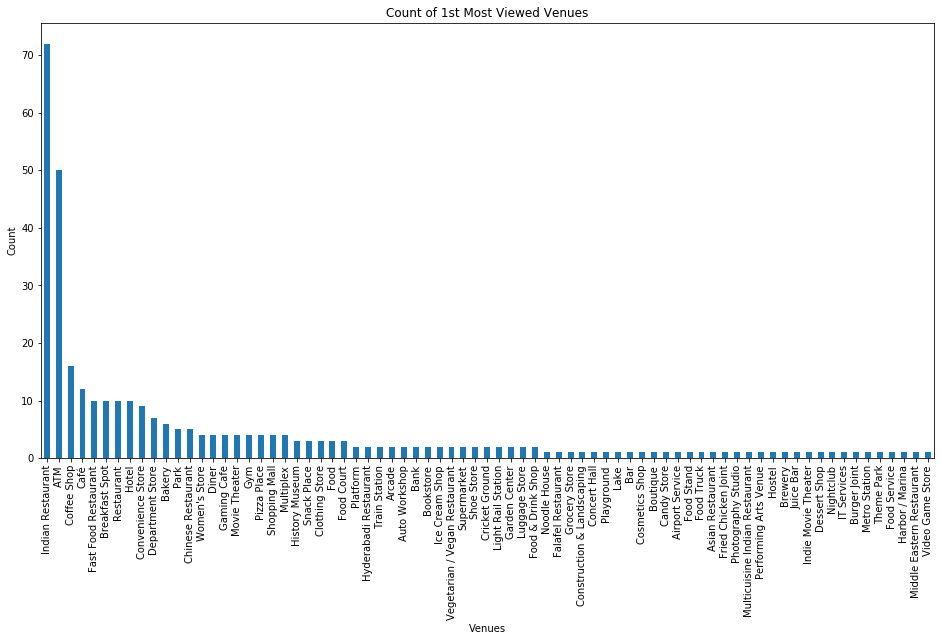

In [44]:
plt.figure(figsize = (16, 8))
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts().plot(kind = 'bar')
plt.title('Count of 1st Most Viewed Venues')
plt.xlabel('Venues')
plt.ylabel('Count')

1st Most Viewed Neighborhood for Indian Restaurant 

In [45]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['1st Most Common Venue'] == 'Indian Restaurant']['Neighborhood']

0           A C Guards
2                Abids
13            Ameerpet
14     Ameerpet X Road
16         Anand Nagar
            ...       
311           Tar Bund
312    Tar Bund X Road
315        Tilak Nagar
316         Tilak Road
322       Vasavi Nagar
Name: Neighborhood, Length: 72, dtype: object

### K-Means

Converting the Venues into 5 Clusters

In [46]:
# set number of clusters
kclusters = 5

Hyderabad_grouped_clustering = Hyderabad_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Hyderabad_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 3, 0, 0, 0, 0, 3, 0, 3])

Inserting Cluster Labels to DataFrame

In [47]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Hyderabad_merged = Hyderabad_areas

# merge Hyderabad_grouped with neighborhoods_venues_sorted to add latitude/longitude for each neighborhood
Hyderabad_merged = pd.merge(Hyderabad_merged, neighborhoods_venues_sorted, left_on = 'Areas', right_on='Neighborhood').drop('Neighborhood', axis = 1)

Hyderabad_merged.head(10) # check the last columns!

,Areas,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gachibowli,17.4436,78.352,0,Café,Italian Restaurant,Stadium,Bakery,Grocery Store,Hotel,Department Store,Food Truck,Ice Cream Shop,Indian Restaurant
1,Shamshabad,17.2611,78.3932,0,Café,Park,Dhaba,Women's Store,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
2,Kukatpally,17.4931,78.4054,3,Indian Restaurant,Fast Food Restaurant,Pizza Place,Shopping Mall,Middle Eastern Restaurant,Bakery,Food,Ice Cream Shop,Breakfast Spot,Dog Run
3,Mallapur,17.4405,78.5789,1,ATM,Diner,Donut Shop,Flower Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
4,Mallapur,17.4405,78.5789,1,ATM,Diner,Donut Shop,Flower Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
5,Habsiguda,17.4155,78.5427,3,Indian Restaurant,Restaurant,Bakery,Sandwich Place,Park,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
6,Jubilee Hills,17.4308,78.4103,3,Indian Restaurant,Coffee Shop,Ice Cream Shop,Hookah Bar,Juice Bar,Bar,Dessert Shop,North Indian Restaurant,Cocktail Bar,Fast Food Restaurant
7,Secunderabad,17.4691,78.5059,3,Indian Restaurant,Ice Cream Shop,Sandwich Place,Shoe Store,Cupcake Shop,Dumpling Restaurant,Flea Market,Cosmetics Shop,Fishing Store,Fast Food Restaurant
8,Banjara Hills,17.4177,78.4399,0,Coffee Shop,Indian Restaurant,Furniture / Home Store,Café,Bar,Bakery,Lounge,Ice Cream Shop,Hookah Bar,Sandwich Place
9,Manikonda,17.4037,78.3766,0,Restaurant,Pizza Place,Women's Store,Dog Run,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant


Map Of Hyderabad with Clustering 

In [48]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Hyderabad_merged['Latitude'], Hyderabad_merged['Longitude'], Hyderabad_merged['Areas'], Hyderabad_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##### Cluster 1

In [60]:
Cluster_1 = Hyderabad_merged.loc[Hyderabad_merged['Cluster Labels'] == 1, Hyderabad_merged.columns[[0] + list(range(4, Hyderabad_merged.shape[1]))]]
Cluster_1

,Areas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Mallapur,ATM,Diner,Donut Shop,Flower Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
4,Mallapur,ATM,Diner,Donut Shop,Flower Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
92,Gagan Pahad,Diner,Women's Store,Donut Shop,Flower Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
116,Jahanuma,Diner,Women's Store,Donut Shop,Flower Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store


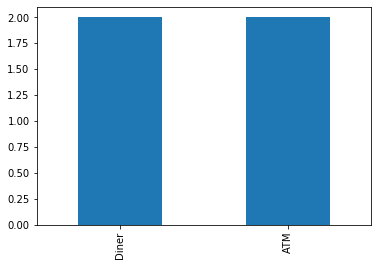

In [61]:
Cluster_1['1st Most Common Venue'].value_counts().plot(kind = 'bar')

##### Cluster 2

In [62]:
Cluster_2 = Hyderabad_merged.loc[Hyderabad_merged['Cluster Labels'] == 2, Hyderabad_merged.columns[[0] + list(range(4, Hyderabad_merged.shape[1]))]]
Cluster_2

,Areas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
204,Osmania University,Park,Women's Store,Dog Run,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant
236,Sanath Nagar,Park,Bus Station,Women's Store,Donut Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
272,Venkatapuram,Park,Women's Store,Dog Run,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant
335,Sanath Nagar IE,Park,Bus Station,Women's Store,Donut Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store


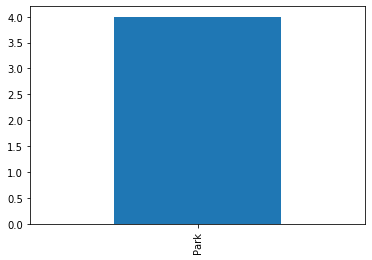

In [63]:
Cluster_2['1st Most Common Venue'].value_counts().plot(kind = 'bar')

##### Cluster 3

In [64]:
Cluster_3 = Hyderabad_merged.loc[Hyderabad_merged['Cluster Labels'] == 3, Hyderabad_merged.columns[[0] + list(range(4, Hyderabad_merged.shape[1]))]]
Cluster_3

,Areas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Kukatpally,Indian Restaurant,Fast Food Restaurant,Pizza Place,Shopping Mall,Middle Eastern Restaurant,Bakery,Food,Ice Cream Shop,Breakfast Spot,Dog Run
5,Habsiguda,Indian Restaurant,Restaurant,Bakery,Sandwich Place,Park,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
6,Jubilee Hills,Indian Restaurant,Coffee Shop,Ice Cream Shop,Hookah Bar,Juice Bar,Bar,Dessert Shop,North Indian Restaurant,Cocktail Bar,Fast Food Restaurant
7,Secunderabad,Indian Restaurant,Ice Cream Shop,Sandwich Place,Shoe Store,Cupcake Shop,Dumpling Restaurant,Flea Market,Cosmetics Shop,Fishing Store,Fast Food Restaurant
10,Ameerpet,Indian Restaurant,Department Store,Sandwich Place,Café,Vegetarian / Vegan Restaurant,Food Court,Juice Bar,Diner,Metro Station,Electronics Store
...,...,...,...,...,...,...,...,...,...,...,...
314,Snehapuri Colony,Indian Restaurant,Bank,Bakery,Women's Store,Electronics Store,Food,Flower Shop,Flea Market,Fishing Store,Fast Food Restaurant
318,Abids,Indian Restaurant,Shoe Store,Juice Bar,Hotel,Diner,Shopping Mall,Fast Food Restaurant,South Indian Restaurant,Mobile Phone Shop,Department Store
320,Sanjeeva Reddy Nagar,Indian Restaurant,Breakfast Spot,Café,Department Store,Juice Bar,Metro Station,South Indian Restaurant,Pizza Place,Sporting Goods Shop,Fishing Store
324,Moghalpura,Dessert Shop,Juice Bar,Indian Restaurant,Café,Women's Store,Dumpling Restaurant,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market


Text(0, 0.5, 'Count')

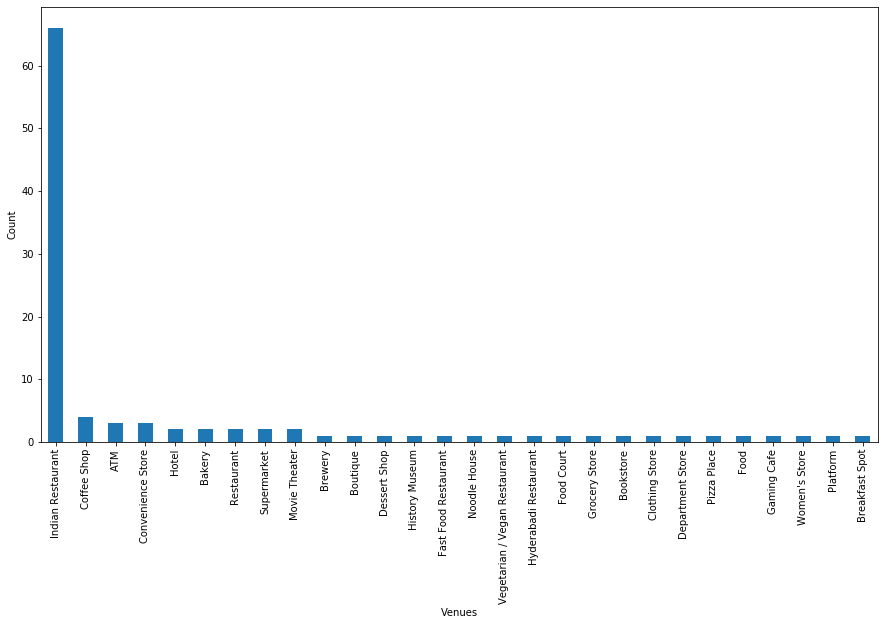

In [55]:
plt.figure(figsize = (15, 8))
Cluster_3['1st Most Common Venue'].value_counts().plot(kind = 'bar')
plt.xlabel('Venues')
plt.ylabel('Count')

##### Cluster 4

In [65]:
Cluster_4 = Hyderabad_merged.loc[Hyderabad_merged['Cluster Labels'] == 4, Hyderabad_merged.columns[[0] + list(range(4, Hyderabad_merged.shape[1]))]]
Cluster_4

,Areas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Quthbullapur,ATM,Food Truck,Donut Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant
22,Aliabad,ATM,Snack Place,Ice Cream Shop,Donut Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
29,Auto Nagar,ATM,Donut Shop,Flower Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant
35,Bairamalguda,ATM,Afghan Restaurant,Night Market,Garden,Concert Hall,Cupcake Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market
45,Bhagya Nagar Colony,ATM,North Indian Restaurant,Accessories Store,Food & Drink Shop,Flower Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant
51,Boudha Nagar,ATM,Light Rail Station,Dumpling Restaurant,Flower Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
53,Boyiguda,ATM,Ice Cream Shop,Donut Shop,Flower Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
58,Chanchalguda,ATM,Hotel Bar,Restaurant,Donut Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
63,Chintal,ATM,Donut Shop,Flower Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant
68,D D Colony,ATM,Donut Shop,Flower Shop,Flea Market,Fishing Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant


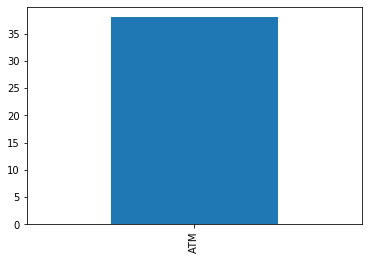

In [66]:
Cluster_4['1st Most Common Venue'].value_counts().plot(kind = 'bar')

##### Cluster 5

In [58]:
Cluster_5 = Hyderabad_merged.loc[Hyderabad_merged['Cluster Labels'] == 5, Hyderabad_merged.columns[[0] + list(range(4, Hyderabad_merged.shape[1]))]]
Cluster_5

,Areas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
